# IS 4487 Lab 10

## Outline

Repeat exercises from Lab 9, but with the *Air Quality Daily AQI* dataset.

Pull the latest "Daily AQI by County" file from this link: https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI

Your target variable is *CATEGORY*, indicating if the air is healthy.  You can focus on either the entire country, split the country in regions, or focus on just one area (ex. Utah).   You can reduce noise by aggregating the data to the month of season level.   

Can you predict the category based on the location and time of year?  

The AQI is divided into six categories:

*Air Quality Index*

|(AQI) Values	|Levels of Health Concern	        |
|---------------|--------|
|0-50	        |Good	 |
|51-100	        |Moderate	 |
|101-150	    |Unhealthy for Sensitive Groups	|
|151 to 200	    |Unhealthy	 |
|201 to 300	    |Very Unhealthy	 |
|301 to 500	    |Hazardous	 |

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab10_air_quality_fit_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [14]:
import pandas as pd
import matplotlib as mpl
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the air quality dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [15]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

df = pd.read_csv (r'/content/drive/MyDrive/Colab Notebooks/aqi.csv')

Mounted at /content/drive


In [16]:
df.describe()

,CBSA Code,AQI,Number of Sites Reporting
count,97601.000000,97601.000000,97601.000000
mean,29894.061126,45.193215,3.214844
std,11495.024819,25.263793,4.625544
min,10100.000000,0.000000,1.000000
25%,19780.000000,33.000000,1.000000
50%,29540.000000,43.000000,2.000000
75%,40140.000000,52.000000,3.000000
max,49740.000000,757.000000,44.000000


## Prepare Data

➡️ Assignment Tasks
- Create one dummy variable (true/false) for each of the Defining Parameter values    
- Create variables for month and season
- Perform any other data cleanup needed (remove outliers, nulls, etc.)
- Select the data you would like to use in the model.  If you aggregate data, you will have to decide whether to use the min, max or mean value for AQI

In [17]:
#create columns

unique_values = ['PM2.5', 'PM10', 'Ozone', 'NO2', 'CO']

for value in unique_values:
    df[value] = (df['Defining Parameter'] == value).astype(int)

df.head(20)


,CBSA,CBSA Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,PM2.5,PM10,Ozone,NO2,CO
0,"Aberdeen, SD",10100,2023-01-01,25,Good,PM2.5,46-013-0004,1,1,0,0,0,0
1,"Aberdeen, SD",10100,2023-01-02,48,Good,PM2.5,46-013-0004,1,1,0,0,0,0
2,"Aberdeen, SD",10100,2023-01-03,25,Good,PM2.5,46-013-0004,1,1,0,0,0,0
3,"Aberdeen, SD",10100,2023-01-04,8,Good,PM2.5,46-013-0004,1,1,0,0,0,0
4,"Aberdeen, SD",10100,2023-01-05,38,Good,PM2.5,46-013-0004,1,1,0,0,0,0
5,"Aberdeen, SD",10100,2023-01-06,44,Good,PM2.5,46-013-0004,1,1,0,0,0,0
6,"Aberdeen, SD",10100,2023-01-07,52,Moderate,PM2.5,46-013-0004,1,1,0,0,0,0
7,"Aberdeen, SD",10100,2023-01-08,80,Moderate,PM2.5,46-013-0004,1,1,0,0,0,0
8,"Aberdeen, SD",10100,2023-01-09,53,Moderate,PM2.5,46-013-0004,1,1,0,0,0,0
9,"Aberdeen, SD",10100,2023-01-10,33,Good,PM2.5,46-013-0004,1,1,0,0,0,0


In [18]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month

df['Month_Name'] = df['Date'].dt.strftime('%B')

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)
df.head(100)

,CBSA,CBSA Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,PM2.5,PM10,Ozone,NO2,CO,Month,Month_Name,Season
0,"Aberdeen, SD",10100,2023-01-01,25,Good,PM2.5,46-013-0004,1,1,0,0,0,0,1,January,Winter
1,"Aberdeen, SD",10100,2023-01-02,48,Good,PM2.5,46-013-0004,1,1,0,0,0,0,1,January,Winter
2,"Aberdeen, SD",10100,2023-01-03,25,Good,PM2.5,46-013-0004,1,1,0,0,0,0,1,January,Winter
3,"Aberdeen, SD",10100,2023-01-04,8,Good,PM2.5,46-013-0004,1,1,0,0,0,0,1,January,Winter
4,"Aberdeen, SD",10100,2023-01-05,38,Good,PM2.5,46-013-0004,1,1,0,0,0,0,1,January,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Aberdeen, SD",10100,2023-04-06,19,Good,PM2.5,46-013-0004,1,1,0,0,0,0,4,April,Spring
96,"Aberdeen, SD",10100,2023-04-07,22,Good,PM2.5,46-013-0004,1,1,0,0,0,0,4,April,Spring
97,"Aberdeen, SD",10100,2023-04-08,41,Good,PM2.5,46-013-0004,1,1,0,0,0,0,4,April,Spring
98,"Aberdeen, SD",10100,2023-04-09,47,Good,PM2.5,46-013-0004,1,1,0,0,0,0,4,April,Spring


In [19]:
df.dropna(inplace=True)

df.drop_duplicates(inplace=True)

def detect_outliers_zscore(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    z_scores = [(x - mean) / std for x in data]
    return np.abs(z_scores) > threshold

outliers_mask = detect_outliers_zscore(df['AQI'])
df = df[~outliers_mask]

df.head(20)

,CBSA,CBSA Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,PM2.5,PM10,Ozone,NO2,CO,Month,Month_Name,Season
0,"Aberdeen, SD",10100,2023-01-01,25,Good,PM2.5,46-013-0004,1,1,0,0,0,0,1,January,Winter
1,"Aberdeen, SD",10100,2023-01-02,48,Good,PM2.5,46-013-0004,1,1,0,0,0,0,1,January,Winter
2,"Aberdeen, SD",10100,2023-01-03,25,Good,PM2.5,46-013-0004,1,1,0,0,0,0,1,January,Winter
3,"Aberdeen, SD",10100,2023-01-04,8,Good,PM2.5,46-013-0004,1,1,0,0,0,0,1,January,Winter
4,"Aberdeen, SD",10100,2023-01-05,38,Good,PM2.5,46-013-0004,1,1,0,0,0,0,1,January,Winter
5,"Aberdeen, SD",10100,2023-01-06,44,Good,PM2.5,46-013-0004,1,1,0,0,0,0,1,January,Winter
6,"Aberdeen, SD",10100,2023-01-07,52,Moderate,PM2.5,46-013-0004,1,1,0,0,0,0,1,January,Winter
7,"Aberdeen, SD",10100,2023-01-08,80,Moderate,PM2.5,46-013-0004,1,1,0,0,0,0,1,January,Winter
8,"Aberdeen, SD",10100,2023-01-09,53,Moderate,PM2.5,46-013-0004,1,1,0,0,0,0,1,January,Winter
9,"Aberdeen, SD",10100,2023-01-10,33,Good,PM2.5,46-013-0004,1,1,0,0,0,0,1,January,Winter


In [20]:
X = df[['PM2.5', 'PM10', 'Ozone', 'NO2', 'CO', 'Month']]  # Features
y = df['AQI']

## Create Regression

➡️ Assignment Tasks
- Create a simple linear regression to predict AQI based on as many variables as you can use or derive.
- Visualize the regression with at least one of the variables

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred))

Mean squared error: 326.50
Coefficient of determination (R^2): 0.12


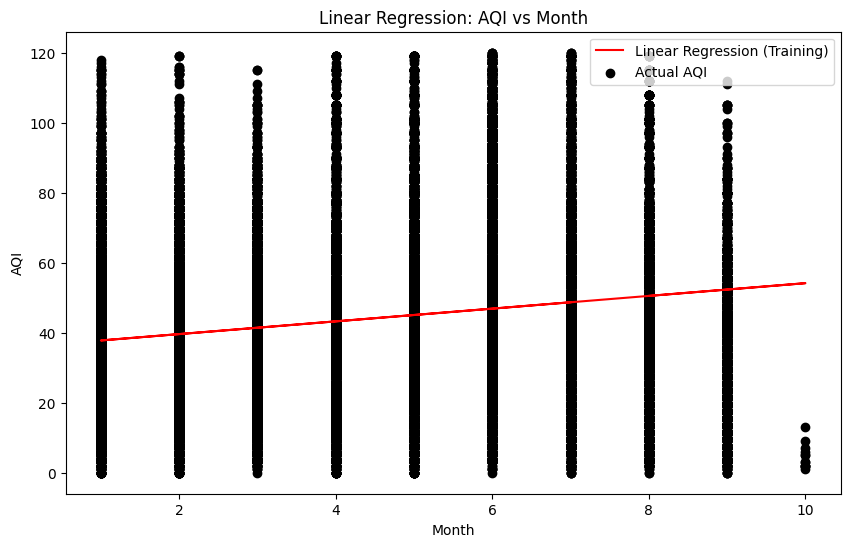

In [22]:
X = df[['Month']]
y = df['AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

plt.figure(figsize=(10, 6))

plt.plot(X_train, y_pred_train, color='red', label='Linear Regression (Training)')

plt.scatter(X, y, color='black', label='Actual AQI')
plt.xlabel('Month')
plt.ylabel('AQI')
plt.title('Linear Regression: AQI vs Month')
plt.legend()

plt.show()


## Make a prediction

➡️ Assignment Tasks
- What would you predict the average AQI to be in the month of January?  

In [23]:
january_data = pd.DataFrame({'Month': [1]})

predicted_AQI_january = model.predict(january_data)

print("Predicted average AQI in the month of January:", predicted_AQI_january[0])



Predicted average AQI in the month of January: 37.79176466428835


## OPTIONAL: Compare Air Quality

➡️ Assignment Tasks
- Download the data from a year 20 years prior, using this website: https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI
- Append the new data to the previous dataframe
- Use the year as a variable in your regression.  Is year a significant factor in predicting AQI?

In [24]:
#import, append and create new model